In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,id,title,author,text,label,combined_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [ ]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
df.shape

(20800, 5)

In [ ]:
df = df.dropna(subset=['text'])

In [ ]:
df = df.dropna(subset=['title'])

In [ ]:
df=df.dropna(subset=['author'])

In [ ]:
df.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [ ]:
df["combined_text"] = df["author"] + " " + df["title"] + " " + df["text"]

In [ ]:
## Get the Independent Features
X=df["combined_text"]
X

,combined_text
0,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,Consortiumnews.com Why the Truth Might Get You...
3,Jessica Purkiss 15 Civilians Killed In Single ...
4,Howard Portnoy Iranian woman jailed for fictio...
...,...
20795,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,Michael J. de la Merced and Rachel Abrams Macy...
20798,"Alex Ansary NATO, Russia To Hold Parallel Exer..."


In [ ]:
## Get the Dependent features
y=df['label']

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
### Vocabulary size
voc_size=30000

In [ ]:
messages = X.copy()
messages[0]

'Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members o

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()
def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)


messages["processed_text"] = messages.apply(lambda x: preprocess(x) if isinstance(x, str) else "")

corpus = messages["processed_text"].tolist()


In [ ]:
corpus

['darrell lucus house dem aide even see comey letter jason chaffetz tweeted house dem aide even see comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative common license apology keith olbermann doubt worst person world week fbi director james comey according house democratic aide look like also know second worst person well turn comey sent infamous letter announcing fbi looking email may related hillary clinton email server ranking democrat relevant committee hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear pertinent investigation ca

In [ ]:
corpus[1]

'daniel j flynn flynn hillary clinton big woman campus breitbart ever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectation hillary rodham overflowed year ago first addressed wellesley graduating class president college informed gathered student needed debate far could ascertain spokesman kind like democratic primary minus term unknown even seven sister school glad miss adam made clear speaking today u u miss rodham told classmate appointing edger bergen charlie mccarthy mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tac

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

In [ ]:
sent_length = 1000
embedded_docs = pad_sequences(sequences, padding='pre', maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ... 15748 28209  3797]
 [    0     0     0 ... 16261  1017  8122]
 [    0     0     0 ...   396  1643  7259]
 ...
 [    0     0     0 ...  3824  3214   650]
 [    0     0     0 ...  2527  4434  3202]
 [    0     0     0 ... 16165  2008  3655]]


In [ ]:
embedding_vector_features = 300
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_shape=(sent_length,)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 1000, 300)           │       9,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 1000, 300)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,321,801 (35.56 MB)

 Trainable params: 9,321,401 (35.56 MB)

 Non-trainable params: 400 (1.56 KB)

None


In [ ]:
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)


In [ ]:
len(embedded_docs),y.shape

(18285, (18285,))

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((18285, 1000), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=13)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64,callbacks=[early_stopping])

Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - accuracy: 0.8212 - loss: 0.3599 - val_accuracy: 0.9516 - val_loss: 0.1843
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 40s 126ms/step - accuracy: 0.9729 - loss: 0.0800 - val_accuracy: 0.9527 - val_loss: 0.1560
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9229 - val_loss: 0.2326
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.9873 - loss: 0.0334 - val_accuracy: 0.8890 - val_loss: 0.4080
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.9904 - loss: 0.0283 - val_accuracy: 0.9478 - val_loss: 0.2687


In [ ]:
y_pred=model.predict(X_test)

115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step


In [ ]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
y_pred=np.where(y_pred > 0.5, 1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9526934645884605

In [ ]:
y_train_pred = model.predict(X_train)

y_train_pred = np.where(y_train_pred > 0.5, 1, 0)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

458/458 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step
Training Accuracy: 0.9881733661471152


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2055   44]
 [ 129 1429]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2099
           1       0.97      0.92      0.94      1558

    accuracy                           0.95      3657
   macro avg       0.96      0.95      0.95      3657
weighted avg       0.95      0.95      0.95      3657



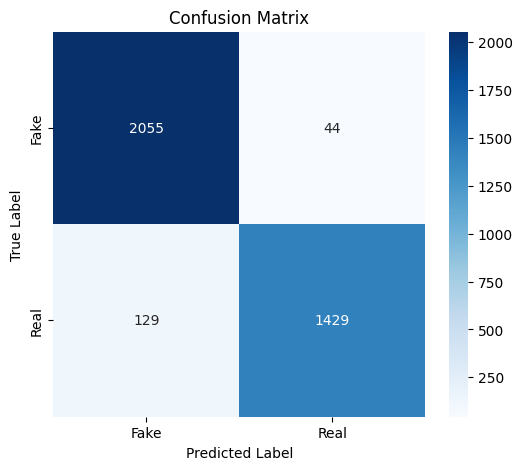

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.save('fake_news_model.h5')